In [1]:
#TOPIC : CREDIT CARD FRAUD DETECTION
'''
COMPONENTS / MODULES -- 
SVM (SUPPORT VECTOR MACHINE)
'''

'\nCOMPONENTS / MODULES -- \nSVM (SUPPORT VECORE MACHINE)\n'

In [2]:
#Importing all the required packages

import numpy as ny
import pandas as ps
import matplotlib.pyplot as pypt
import seaborn as sbn
import warnings 
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [5]:
# Importing / loading dataset

cred = ps.read_csv("D:\Projects\UnderGradProjects\Credit Card Fraud Detection System _ A Comparison study on various Machine Learning and Deep Learning Algorithms\creditcard.csv")
cred.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#Lets remove time here - reason - we already saw that in ANN

cred = cred.drop("Time", axis=1)

In [7]:
#Lets Standardize Amount

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [9]:
cred['std_Amount'] = scaler.fit_transform(cred['Amount'].values.reshape (-1,1))

cred = cred.drop("Amount", axis=1)

<AxesSubplot:xlabel='Class', ylabel='count'>

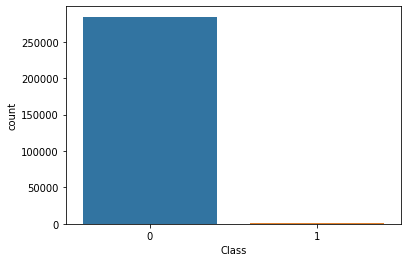

In [10]:
sbn.countplot(x="Class" , data = cred)

In [12]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

und_sam = RandomUnderSampler(sampling_strategy=0.5)

In [13]:
cols = cred.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

In [14]:
X = cred[cols]
Y = cred[target]

X_under, Y_under = und_sam.fit_resample(X, Y)

In [15]:
from pandas import DataFrame
test = ps.DataFrame(Y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

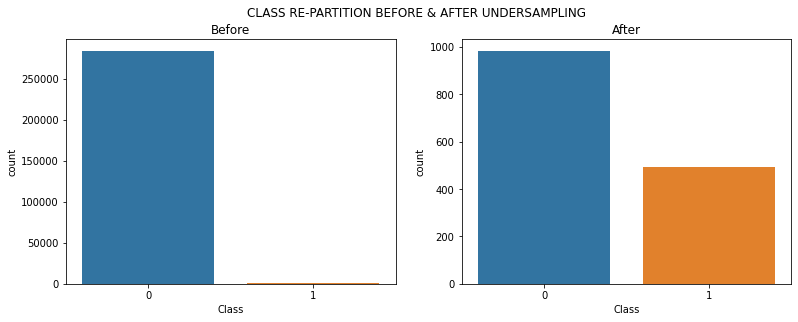

In [17]:
fig, axs = pypt.subplots(ncols=2, figsize=(13,4.5))
sbn.countplot(x="Class", data=cred, ax=axs[0])
sbn.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("CLASS RE-PARTITION BEFORE & AFTER UNDERSAMPLING")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

In [18]:
#Now at this very point , I shall say that the dataset is balanced

In [19]:
#Let us split the data for training and testing purpose

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)

In [21]:
#FROM HERE ONWARDS WE SHALL DO MODELLING ! I MEAN CREATING THE MODEL OF SVM

#Importing packages

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [24]:
#Lets train the model for SVM

train_model = SVC(probability=True, random_state=2)
SVC_model = train_model.fit(X_train, Y_train)

In [25]:
#Lets predict

Y_predict_SVM = train_model.predict(X_test)

In [31]:
#EVALUATION MERICS

print("Accuracy of the SVM model : ",metrics.accuracy_score(Y_test, Y_predict_SVM))
print("Precision of the SVM model : ",metrics.precision_score(Y_test, Y_predict_SVM))
print("Recall of the SVM model : ",metrics.recall_score(Y_test, Y_predict_SVM))
print("F1_Score of the SVM model : ",metrics.f1_score(Y_test, Y_predict_SVM))

Accuracy SVM: 0.9493243243243243
Precision SVM: 1.0
Recall SVM: 0.8611111111111112
F1 Score SVM: 0.9253731343283582


In [33]:
'''
Thus , if converted to percentage (approximately) ---
Accuracy =  94.93%
Precision = 100.0%
Recall = 86.11%
F1_Score = 92.54%
'''

'\nThus , if converted to percentage (approximately) ---\nAccuracy =  94.93%\nPrecision = 100.0%\nRecall = 86.11%\nF1_Score = 92.54%\n'

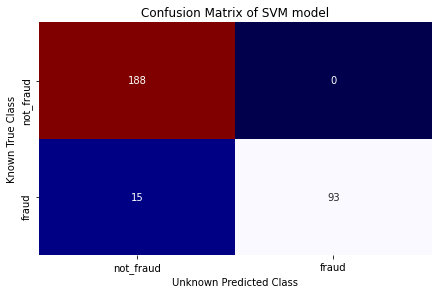

In [37]:
#Lets build the confusion matrix

mat_svm = confusion_matrix(Y_test, Y_predict_SVM)
cm_svm = ps.DataFrame(mat_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sbn.heatmap(cm_svm, annot=True, cbar=None, cmap="seismic", fmt = 'g')
pypt.title("Confusion Matrix of SVM model"), pypt.tight_layout()
pypt.ylabel("Known True Class"), pypt.xlabel("Unknown Predicted Class")
pypt.show()

In [ ]:
#Thus , we conclude the model of SVM along with the required metrics. 